# **Flight Delay Prediction**
#### *Team Name: Star Squad*
**Team Members**: Sohum Bhole, Mohammad Nusairat, Nahom Yohanes, Richa Rameshkrishna, Vageesh Indukuri\
**Project Title**: Flight Time Optimization\
**Date**: 11-30-2024\
**Course**: CS 418 (Introduction to Data Science)\
**Instructor**: Professor Ziebart

### **Step 1: Load Necessary Libraries**
*Below are the libraries required for this project*

**Pandas and NumPy**: For data manipulation and numerical computations.\
**Scikit-learn**: For splitting the dataset into training and testing sets.\
**Machine Learning Models**: Random Forest, Gradient Boosting, and Logistic Regression.\
**Evaluation Metrics**: Accuracy, classification report, and confusion matrix.\
**Matplotlib and Seaborn**: For creating visualizations to visually explore and understand the data.\
**StandardScaler**: To normalize the features for better performance in some models.

In [1]:
# Step 1: Load Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

### **Step 2: Load the Dataset**
*Dataset was pulled off of https://transtats.bts.gov/databases.asp?Z1qr_VQ=E&Z1qr_Qr5p=N8vn6v10&f7owrp6_VQF=D, with features selected from https://transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr*.

The dataset is read from a CSV file using `pandas.read_csv()`. This file contains information such as airport IDs, delays, and other flight-related features.

In [2]:
# Step 2: Load Dataset
file_path = "T_ONTIME_REPORTING.csv"
data = pd.read_csv(file_path)

### **Step 3: Data Cleaning**
*We will clean the data prior to analyzing it.*

**Removing duplicates**: Duplicate rows are removed to avoid redundancy using `drop_duplicates()`.\
**Handling missing values**: Rows with missing values are dropped using `data.dropna()`. Alternatively, imputation techniques can be used if needed.\
**Encoding categorical variables**: This step transforms categorical features into numerical ones (e.g., airline names to numeric codes) to make the data usable by machine learning algorithms. Example: `data['AIRLINE'] = data['AIRLINE'].astype('category').cat.codes`.

In [3]:
# Step 3: Data Cleaning

# Keep only flights that are not canceled
data = data[data['CANCELLED'] != 1.0]

# Keep only flights that originate from ORD
data = data[data['ORIGIN'] == 'ORD']

# 'CRS_' prefix indicates the scheduled or expected values for arrival or departure

# Impute missing values for the causes of delays
columns_to_impute = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
data[columns_to_impute] = data[columns_to_impute].fillna(0)

# Display the first few rows of the cleaned data
data.head()

,ORIGIN,ORIGIN_STATE_NM,DEST,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
25984,ORD,Illinois,ABE,Pennsylvania,1350,1342.0,-8.0,1655,1627.0,-28.0,0.0,655.0,0.0,0.0,0.0,0.0,0.0
25985,ORD,Illinois,ABE,Pennsylvania,1350,1345.0,-5.0,1655,1632.0,-23.0,0.0,655.0,0.0,0.0,0.0,0.0,0.0
25986,ORD,Illinois,ABE,Pennsylvania,1350,1345.0,-5.0,1655,1639.0,-16.0,0.0,655.0,0.0,0.0,0.0,0.0,0.0
25987,ORD,Illinois,ABE,Pennsylvania,1350,1350.0,0.0,1655,1649.0,-6.0,0.0,655.0,0.0,0.0,0.0,0.0,0.0
25988,ORD,Illinois,ABE,Pennsylvania,1350,1358.0,8.0,1655,1659.0,4.0,0.0,655.0,0.0,0.0,0.0,0.0,0.0


### **Step 4: Exploratory Data Analysis (EDA)**
*We will explore the data to find trends and derive insights.*

**Basic Statistics**: Use data.describe() to view summary statistics (mean, min, max, etc.).\
**Distribution of Delays**: A count plot using seaborn.countplot shows the proportion of delayed and on-time flights.\
**Correlation Matrix**: A heatmap using seaborn.heatmap visualizes the correlations between numerical features.\
**Top Airports by Frequency**: Bar plots are created to display the top 10 airports by frequency of operations.

       CRS_DEP_TIME      DEP_TIME     DEP_DELAY  CRS_ARR_TIME      ARR_TIME  \
count  18901.000000  18901.000000  18901.000000  18901.000000  18880.000000   
mean    1349.046770   1376.859584     23.485001   1598.890852   1574.283422   
std      453.807591    468.196841     71.042594    464.937944    508.482480   
min      500.000000      1.000000    -21.000000      1.000000      1.000000   
25%      925.000000    950.000000     -4.000000   1205.000000   1208.000000   
50%     1345.000000   1355.000000      0.000000   1611.000000   1605.000000   
75%     1805.000000   1819.000000     21.000000   2047.000000   2038.000000   
max     2300.000000   2400.000000   1838.000000   2359.000000   2400.000000   

          ARR_DELAY  CANCELLED      DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
count  18816.000000    18901.0  18901.000000   18901.000000   18901.000000   
mean      19.385470        0.0    801.762023       7.428073       4.108090   
std       74.332362        0.0    503.130801      41.1

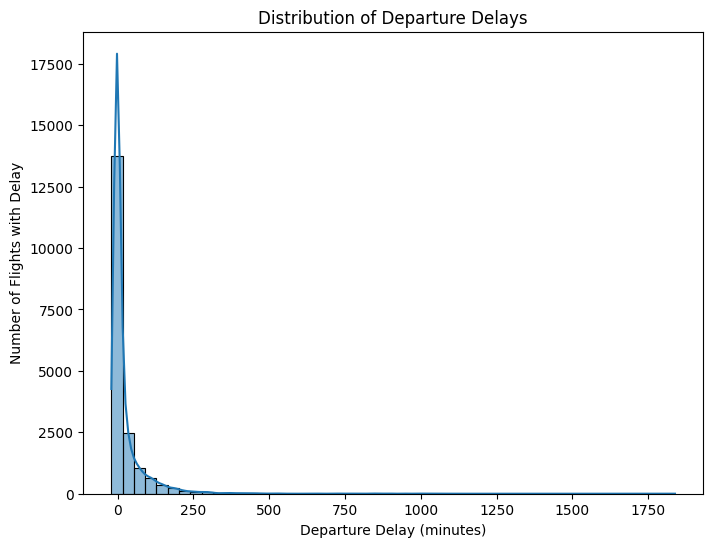

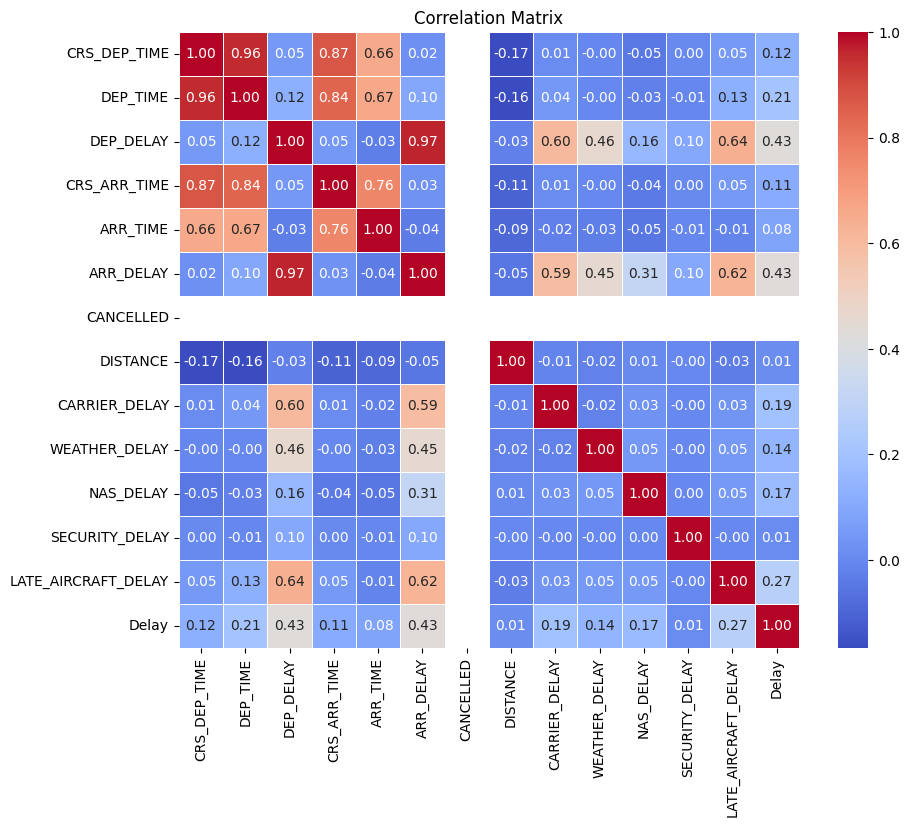

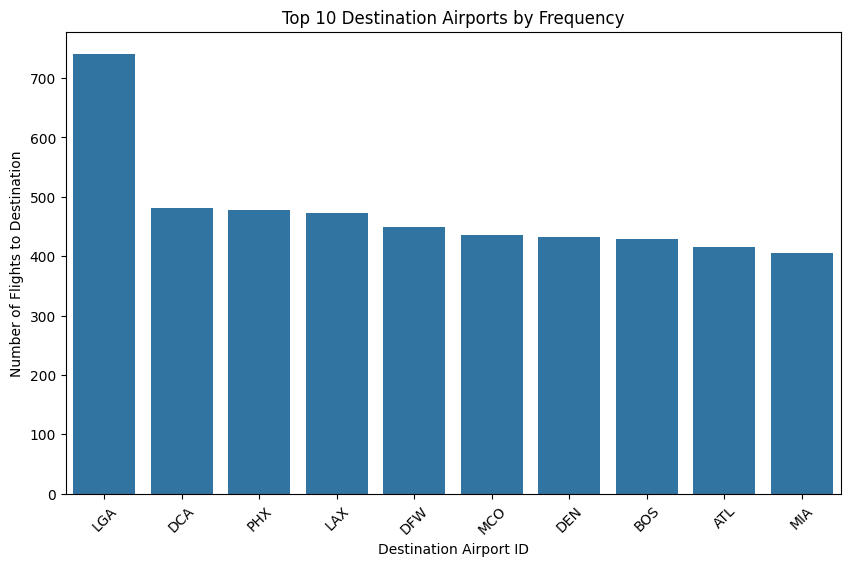

In [7]:
# Step 4: Exploratory Data Analysis (EDA)
# Basic statistics
print(data.describe())

# Distribution of delays
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='DEP_DELAY', bins=50, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Number of Flights with Delay')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualize top destination airports
top_destinations = data['DEST'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_destinations.index, y=top_destinations.values)
plt.title('Top 10 Destination Airports by Frequency')
plt.xlabel('Destination Airport ID')
plt.ylabel('Number of Flights to Destination')
plt.xticks(rotation=45)
plt.show()

### **Step 5: Implementation of Various Machine Learning Models**
*The data will be split and modeled using various ML techniques to derive predictions on flight delays.*

**Feature and Target Selection**: Features will include: Origin and destination airport IDs, city market IDs. Target will be: Delay status (binary classification).\
**Train-Test Split**: Data is split into training and testing sets (80%-20% split).\
**Feature Scaling**: Normalizes numerical features using StandardScaler.\
**Random Forest Classifier**: A tree-based ensemble method. Trains the model and predicts delays.\
**Logistic Regression**: A simple linear model trained on scaled features.\
**Gradient Boosting Classifier**: Another ensemble method focusing on iterative learning to improve predictions.

In [8]:
# Prepare data for modeling

# Updated feature set with delay causes
features = [
    'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DISTANCE', 
    'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 
    'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'
]

# Create binary target for delay (1 = Delayed, 0 = On-time)
data['Delay'] = (data['DEP_DELAY'] > 0).astype(int)

# Select features and target
X = data[features]
y = data['Delay']

# Encode categorical variables (ORIGIN, DEST)
X = pd.get_dummies(X, columns=['ORIGIN', 'DEST'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best k: 2 with Accuracy: 0.71


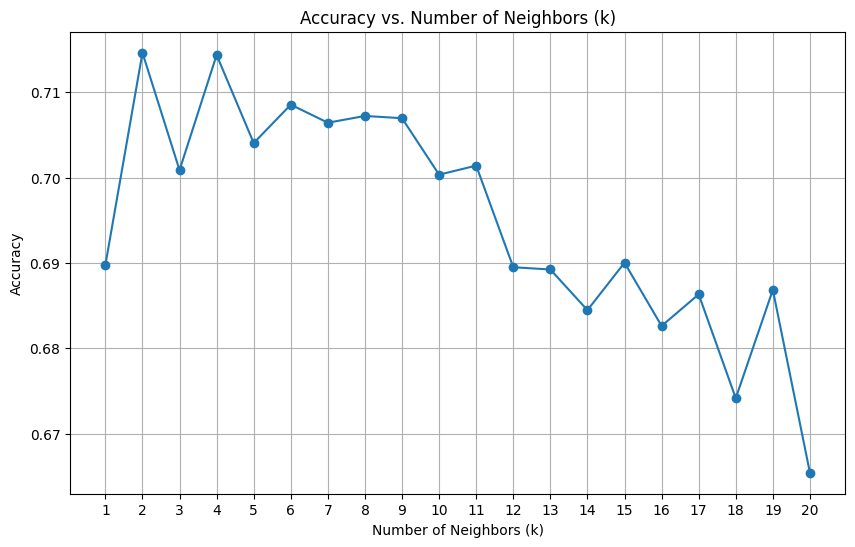

In [9]:
# Find the Optimal k value for KNN Model

# Define a range of k values to test
k_values = range(1, 21)
accuracies = []

# Loop through different k values
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    knn_preds = knn_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, knn_preds)
    accuracies.append(acc)

# Find the best k
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

print(f"Best k: {best_k} with Accuracy: {best_accuracy:.2f}")

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [10]:
# Step 5: Machine Learning Models with Delay Causes

# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

# Model 2: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)  # Increased iterations for convergence
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_preds)

# Model 3: Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_preds)

# Model 4: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)
knn_preds = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_preds)

### **Step 6: Model Evaluation**
*Evaluate the accuracy and performance of each model.*

**Accuracy Scores**: Print the accuracy of each model.

In [11]:
# Step 6: Model Evaluation
# Print accuracy scores
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(f"Optimized KNN Accuracy: {knn_accuracy:.2f}")

Random Forest Accuracy: 0.79
Logistic Regression Accuracy: 0.80
Gradient Boosting Accuracy: 0.81
Optimized KNN Accuracy: 0.71


### **Step 7: Visualizations**
*Plotting the information pulled from the ML models.*

**Feature Importances**: Plot feature importance scores for the Random Forest model using a bar plot. This helps identify which features contribute most to predictions.\
**Confusion Matrix**: Visualize the confusion matrix for the Random Forest model using a heatmap.

In [14]:
# Feature importance extracted from Random Forest
importances = rf_model.feature_importances_
features_list = X.columns
importance_df = pd.DataFrame({'Feature': features_list, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("Top Features by Importance:")
print(importance_df.head(10))

Top Features by Importance:
                Feature  Importance
2         CARRIER_DELAY    0.245708
0          CRS_DEP_TIME    0.224348
6   LATE_AIRCRAFT_DELAY    0.219249
3         WEATHER_DELAY    0.111171
4             NAS_DELAY    0.098043
1              DISTANCE    0.019734
51             DEST_EWR    0.001717
72             DEST_IAH    0.001697
83             DEST_LGA    0.001630
10             DEST_ASE    0.001575


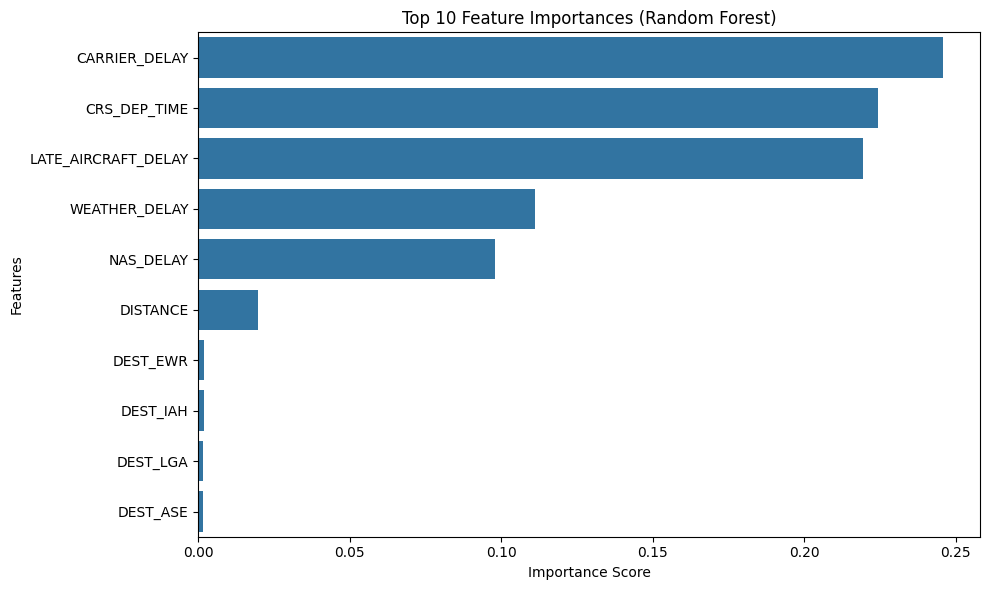

In [15]:
# Use X_train's columns to match expanded feature names after encoding
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values[:10], y=feature_importances.index[:10])  # Display top 10 features
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

The Feature Importances figure reveals that flight delays are predominantly driven by operational and scheduling factors. The most significant contributers include carrier-related issues, scheduled departure time and late aircraft arrivals, which accounts for nearly 68% of the models predictive power. Second factors, such as weather delays and air traffic control-related delays also play a role but to a lesser extent. Features like flight distance and destination airports have a very minimal impact. This tells us that flight delays are more influenced by airline operation and scheduling inefficencies.

In [16]:
# Classification Report for Random Forest
print("\nClassification Report: Random Forest")
print(classification_report(y_test, rf_preds, target_names=['On-time', 'Delayed']))


Classification Report: Random Forest
              precision    recall  f1-score   support

     On-time       0.76      0.89      0.82      2043
     Delayed       0.84      0.67      0.74      1738

    accuracy                           0.79      3781
   macro avg       0.80      0.78      0.78      3781
weighted avg       0.80      0.79      0.79      3781



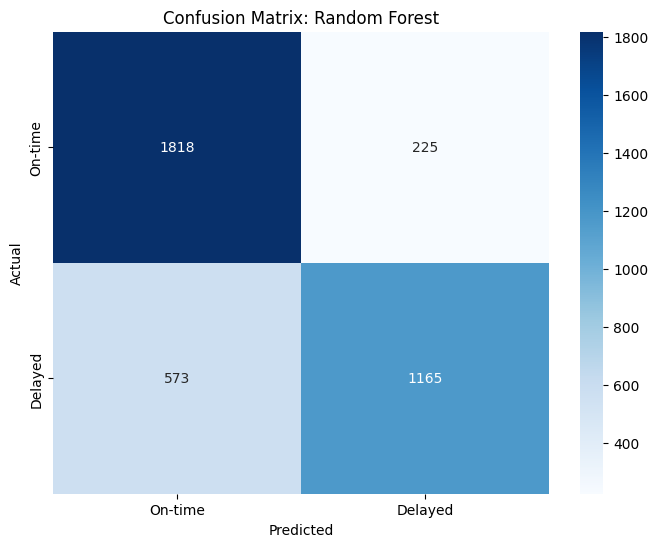

In [17]:
# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_preds)

# Plot Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On-time', 'Delayed'], yticklabels=['On-time', 'Delayed'])
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Confusion matrix for Random Forest figure shows the performance of the model predicting flight delays. It corectly classified 1818 on-time flights and 1165 delayed flights. However, the model misclassified 573 delayed flights as on-time [False Negative], indicating a challenge in detecting all delays, and 225 on-time flights as delayed [False Positives] which can lead to unnecessary delay alerts. 

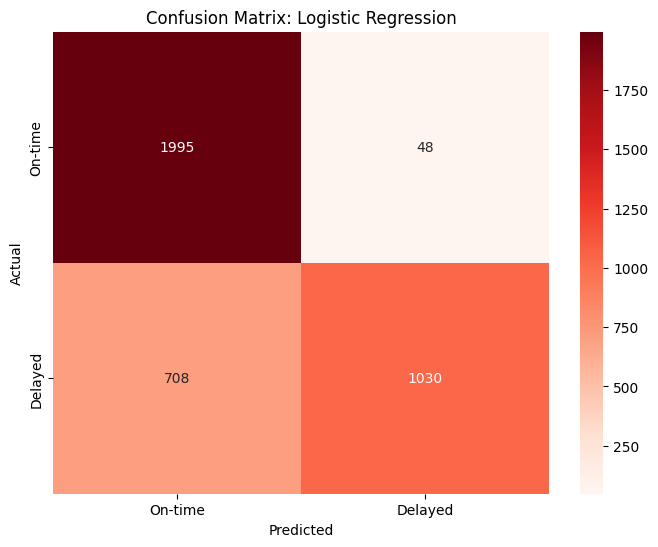

In [18]:
# Confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_preds)

# Plot Logistic Regression Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['On-time', 'Delayed'], yticklabels=['On-time', 'Delayed'])
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Confusion matrix for Logistic Regression figure explains the performance of the model in predicting flight delays. The model precisely classified 1995 on-time flights and 1030 delayed flights, showing good overall accuracy. However, the model misclassified 708 delayed flights as on-time [False Negative] and 48 on-time flights were incorectly predicted as delayed [False Positive]. We can conclude that the model demostrates strong precision for recognizing delays.

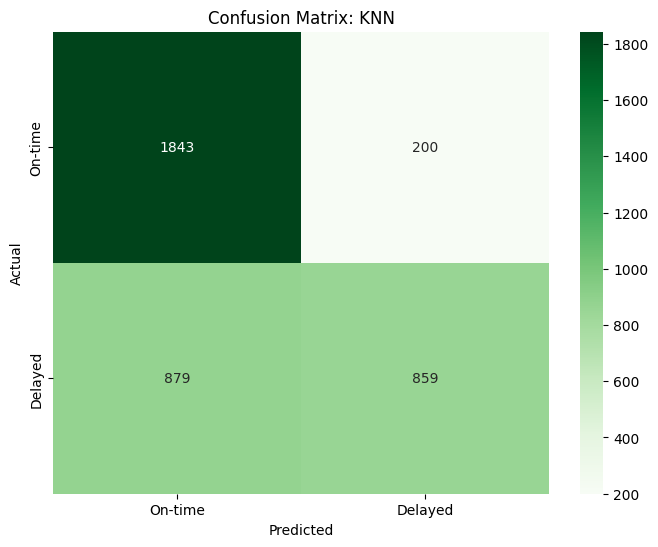

In [19]:
# Confusion matrix for KNN with Parameter Tuning
knn_cm = confusion_matrix(y_test, knn_preds)

# Plot KNN Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['On-time', 'Delayed'], yticklabels=['On-time', 'Delayed'])
plt.title('Confusion Matrix: KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Confusion Matrix for KNN figure demostrates the performance of the model in predicting flight delays. The model correctly identified 1843 on-time flights and 859 delayed flight. However the model misclassified 879 delayed flight as on-time [False negative] and 200 on-time flights as delayed [False Positive]. While the model achives a moderate balance between precision and recall, it can be improved by better identifying delayed flights to reduce missed delays.

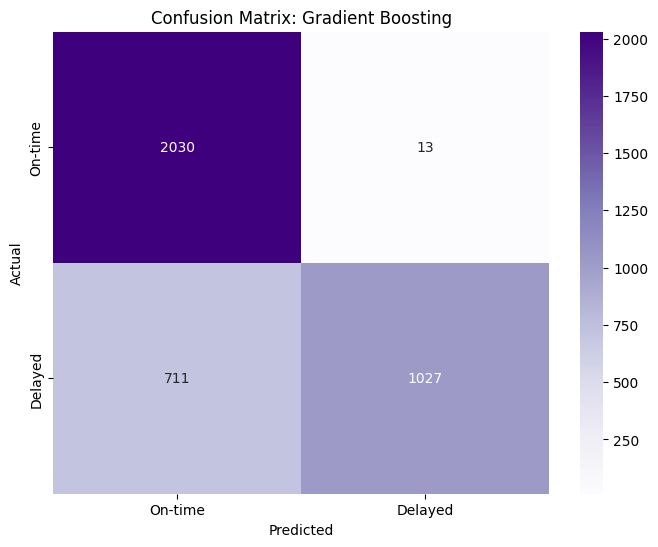

In [20]:
# Confusion matrix for Gradient Boosting
gb_cm = confusion_matrix(y_test, gb_preds)

# Plot Gradient Boosting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Purples', xticklabels=['On-time', 'Delayed'], yticklabels=['On-time', 'Delayed'])
plt.title('Confusion Matrix: Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix for Gradient Boosting figure shows the performance of the model in predicting flight delays. It displays that the model precisely classified 2030 on-time flisgts and 1027 delayed flights. However the model wrongly predicted 711 delayed flights as on-time [False Negative] and 13 on-time flights as delayed [False Positive]. This indicates strong precision for predicting delays but highlights the need to improve recall for capturing all actual delays.

### **Step 8: Results - Connecting Insights to Optimizing Flight Time by Predicting Delays**
*The information extracted and learned from the data analysis, modeling, and visualization done above.*

**Summarize Insights**: 

1. *Factors Driving Delays*:
Carrier-related issues, Late aircraft arrivals and Scheduled departure times are the most significant predictory delays, while weather and air traffic control delays are secondary factors. In contast, Flight distance and Destinations pecifics have minimal impact on the flight delays.

2. *Trends and patters*:
Flights scheduled during peak hours and certain destination airports experience higher delays due to congestion and systemic issues.

**Model Results**:

Gradient Boosting achieved the highest accuracy at 81% showing its capability in handling complex relationship in data. Followed by Logistic Regression 80% and Random Forest 79%, while KNN performed the least effectively at 71%. All models demonstrated good precision identifying delayed flights but struggled with recall leading to missed delay predictions.

**Practical Implications**: 

1. *For Airlines and Operation managment*:
Airlines should focus on minimizing carrier-related delays by optimizing aircraft turnaround times and adding buffer time to schedules for routes prone to delays. Airlines also can use data driven predictive tools that offers actionable insights to proactively address delays and boost operational efficiency. These measures can improve punctuality and provide a smother passenger experience.


2. *For Airport Authorities*:
Airport authorities can enhance delay management by optimizing resource allocation during peak congestion hours and implementing effective contengency plans for adverse weather.


**Conclusion**: 

Airlines should prioritize on improving operational efficency and flight schedules using predictive insights. They can achieve the necessary efficency by incorporating additional data and experiment with advance algorithms like deep learning for better predictions. Stakeholders can use these findings to improve customer satisfaction, boost punctuality and efficency.